MAE: 638.7450148121629, RMSE: 800.7910250989889, R²: -0.009757375991499284
MAE: 638.7450148121629, RMSE: 800.7910250989889, R²: -0.009757375991499284


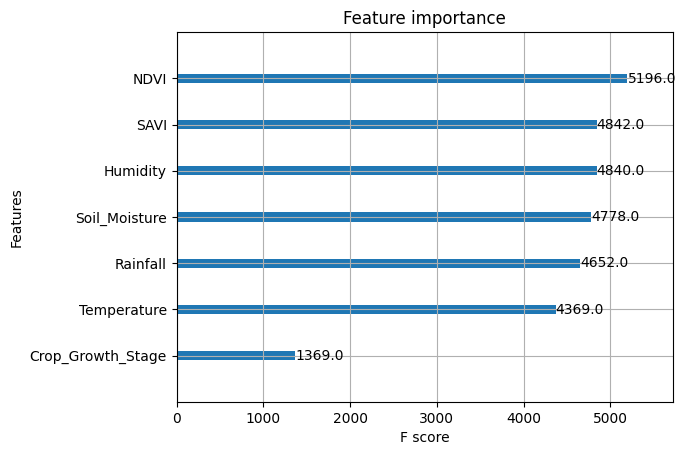

In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("ndvi.csv")

# Select relevant features
features = ["Crop_Growth_Stage", "NDVI", "SAVI", "Soil_Moisture", "Temperature", "Humidity", "Rainfall"]
target = "Expected_Yield"

# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Normalize numerical features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse", n_estimators=500, learning_rate=0.05)

# Train model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Compute MSE
rmse = np.sqrt(mse)  # Compute RMSE manually
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")

# Feature Importance Plot
xgb.plot_importance(xgb_model)
plt.show()


PLANT HEALTH STATUS


Model Accuracy: 0.9958

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      0.99      0.99        85
           2       0.99      1.00      0.99        90

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix:
 [[65  0  0]
 [ 0 84  1]
 [ 0  0 90]]


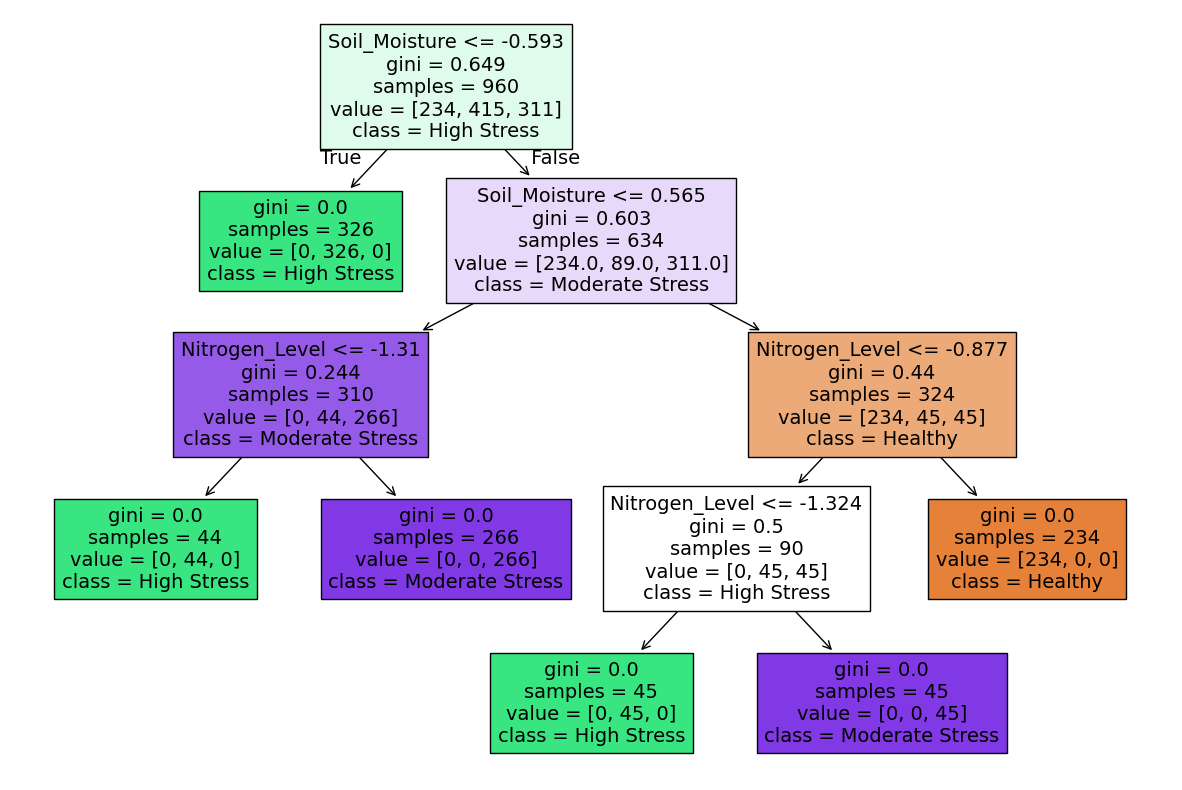


Predicted Plant Health Status: Healthy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("plant_health_data.csv")

# Features and target
features = ["Soil_Moisture", "Ambient_Temperature", "Soil_Temperature", "Humidity",
            "Light_Intensity", "Soil_pH", "Nitrogen_Level", "Phosphorus_Level",
            "Potassium_Level", "Chlorophyll_Content", "Electrochemical_Signal"]
target = "Plant_Health_Status"

# Handle missing values
# Fill numeric columns with the median
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill non-numeric columns with the mode
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode target variable (Healthy=0, Moderate Stress=1, High Stress=2)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Normalize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()

# Sample input for prediction
sample_input = np.array([[45, 28, 25, 60, 12000, 6.5, 30, 15, 40, 35, -50]])  # Replace with real values
sample_input = scaler.transform(sample_input)  # Apply scaling

# Make prediction
predicted_class = dt_model.predict(sample_input)
predicted_label = label_encoder.inverse_transform(predicted_class)
print("\nPredicted Plant Health Status:", predicted_label[0])

MARKET TRENDS



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("price_data.csv")

# Drop irrelevant columns
df.drop(columns=["id", "status"], inplace=True)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical features
label_encoders = {}
for col in ["state", "apmc", "commodity", "Commodity_Uom"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert date to numerical features
df["created_at"] = pd.to_datetime(df["created_at"])
df["year"] = df["created_at"].dt.year
df["month"] = df["created_at"].dt.month
df["day"] = df["created_at"].dt.day
df.drop(columns=["created_at"], inplace=True)

# Define features and target
X = df[["state", "apmc", "commodity", "min_price", "max_price", "commodity_arrivals", "commodity_traded", "Commodity_Uom", "year", "month", "day"]]
y = df["modal_price"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Sample prediction
sample_input = np.array([[2, 5, 10, 6, 9, 20000, 19500, 1, 2025, 3, 20]])  # Replace with real values
sample_input = scaler.transform(sample_input)
predicted_price = xgb_model.predict(sample_input)
print("\nPredicted Modal Price:", predicted_price[0])


R² Score: 0.9645
MAE: 179.80
RMSE: 629.03

Predicted Modal Price: 86.79891


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("price_data.csv")

# Drop irrelevant columns
df.drop(columns=["id", "status"], inplace=True)

# Create Price Fluctuation Category
df["price_fluctuation"] = df["max_price"] - df["min_price"]
df["price_category"] = pd.cut(df["price_fluctuation"], bins=[0, 5, 15, float("inf")], labels=["Low", "Medium", "High"])

# Encode categorical features
label_encoders = {}
for col in ["state", "apmc", "commodity", "Commodity_Uom", "price_category"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert date to numerical features
df["created_at"] = pd.to_datetime(df["created_at"])
df["year"] = df["created_at"].dt.year
df["month"] = df["created_at"].dt.month
df["day"] = df["created_at"].dt.day
df.drop(columns=["created_at"], inplace=True)

# Define features and target
X = df[["state", "apmc", "commodity", "commodity_arrivals", "commodity_traded", "year", "month", "day"]]
y = df["price_category"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train RandomForest Classifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

# Sample Prediction
sample_input = np.array([[2, 5, 10, 20000, 19500, 2025, 3, 20]])  # Replace with real values
sample_input = scaler.transform(sample_input)
predicted_category = rf_model.predict(sample_input)
print("\nPredicted Price Fluctuation Category:", label_encoders["price_category"].inverse_transform(predicted_category)[0])


Accuracy: 0.7873


ValueError: Number of classes, 4, does not match size of target_names, 3. Try specifying the labels parameter

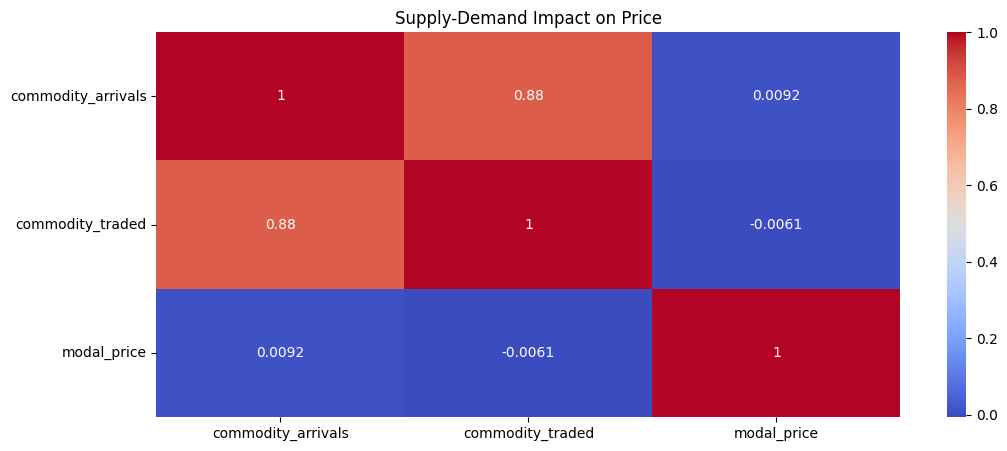

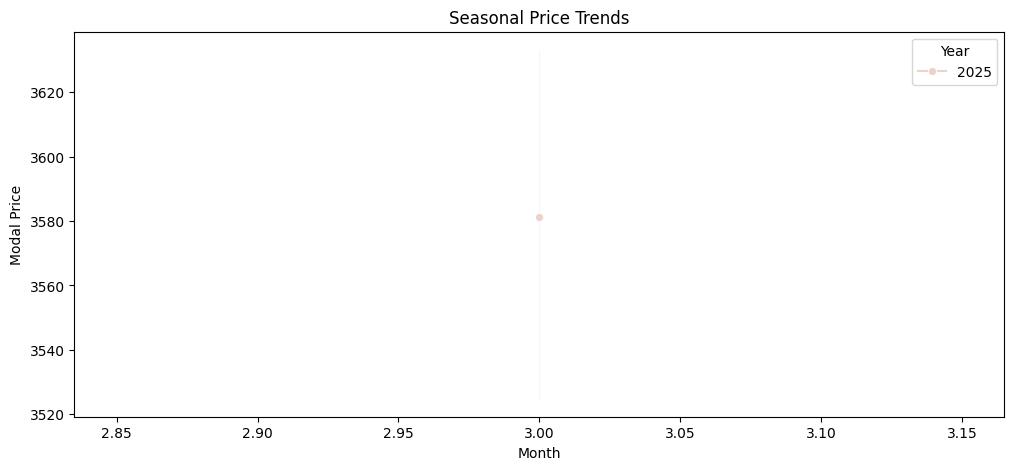

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("price_data.csv")

# Convert date to datetime format
df["created_at"] = pd.to_datetime(df["created_at"])

# Supply-Demand Impact on Price
plt.figure(figsize=(12, 5))
sns.heatmap(df[["commodity_arrivals", "commodity_traded", "modal_price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Supply-Demand Impact on Price")
plt.show()

# Seasonal Price Trends
df["month"] = df["created_at"].dt.month
df["year"] = df["created_at"].dt.year

plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="month", y="modal_price", hue="year", marker="o")
plt.title("Seasonal Price Trends")
plt.xlabel("Month")
plt.ylabel("Modal Price")
plt.legend(title="Year")
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

# Load Dataset
df = pd.read_csv("price_data.csv")  # Ensure correct filename

# Convert date to year, month, day
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day
df.drop(columns=['created_at'], inplace=True)

# Encode categorical features
label_encoders = {}
categorical_cols = ['state', 'apmc', 'commodity', 'Commodity_Uom']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop rows with missing target values
df = df.dropna(subset=['modal_price', 'max_price', 'min_price'])

# Features and Targets
features = ['state', 'apmc', 'commodity', 'commodity_arrivals', 'commodity_traded', 'year', 'month', 'day']
X = df[features]

# --- PRICE PREDICTION (Regression) ---
y_price = df['modal_price']
X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=42)
price_model = DecisionTreeRegressor(max_depth=15, min_samples_split=5, random_state=42)
price_model.fit(X_train, y_train)
y_pred_price = price_model.predict(X_test)
print("Price Prediction R2 Score:", r2_score(y_test, y_pred_price))

# --- PRICE RANGE ESTIMATION (Classification) ---
df['price_range'] = pd.cut(df['max_price'] - df['min_price'], bins=[-np.inf, 5, 15, np.inf], labels=[0, 1, 2])
df = df.dropna(subset=['price_range'])  # Ensure no NaN values in the target
y_range = df['price_range']
X = df[features]  # Ensure X and y have the same number of samples
X_train, X_test, y_train, y_test = train_test_split(X, y_range, test_size=0.2, random_state=42)
range_model = DecisionTreeClassifier(max_depth=15, random_state=42)
range_model.fit(X_train, y_train)
y_pred_range = range_model.predict(X_test)
print("Price Range Accuracy:", accuracy_score(y_test, y_pred_range))

# --- SUPPLY-DEMAND IMPACT ON PRICE ---
correlation_matrix = df[['commodity_arrivals', 'commodity_traded', 'modal_price']].corr()
print("\nSupply-Demand Correlation:\n", correlation_matrix)

# --- SEASONAL PRICE TRENDS ---
avg_monthly_price = df.groupby(['commodity', 'month'])['modal_price'].mean().unstack()
print("\nMonthly Price Trends:\n", avg_monthly_price)

# Sample Prediction
sample_input = np.array([[2, 5, 10, 20000, 19500, 2025, 3, 20]])  # Replace with real values
predicted_price = price_model.predict(sample_input)
predicted_range = range_model.predict(sample_input)
print("Predicted Modal Price:", predicted_price[0])
print("Predicted Price Range Category:", predicted_range[0])

Price Prediction R2 Score: 0.8565865076706686
Price Range Accuracy: 0.7848335388409371

Supply-Demand Correlation:
                     commodity_arrivals  commodity_traded  modal_price
commodity_arrivals            1.000000          0.881257     0.009153
commodity_traded              0.881257          1.000000    -0.006101
modal_price                   0.009153         -0.006101     1.000000

Monthly Price Trends:
 month                 3
commodity              
0          12571.500000
1           4060.125000
2           7270.822785
3           2950.000000
4           4694.714286
...                 ...
324         2546.666667
325         2671.500000
326         2533.000000
327         3808.545455
328        10200.000000

[329 rows x 1 columns]
Predicted Modal Price: 1500.0
Predicted Price Range Category: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load Dataset
df = pd.read_csv("price_data.csv")  # Ensure correct filename

# Convert date to year, month, day
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day
df.drop(columns=['created_at'], inplace=True)

# Encode categorical features
label_encoders = {}
categorical_cols = ['state', 'apmc', 'commodity', 'Commodity_Uom']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop rows with missing target values
df = df.dropna(subset=['modal_price', 'max_price', 'min_price'])

# Features and Targets
features = ['state', 'apmc', 'commodity', 'commodity_arrivals', 'commodity_traded', 'year', 'month', 'day']
X = df[features]

# --- PRICE PREDICTION (Regression) ---
y_price = df['modal_price']
X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=42)

# Hyperparameter tuning for RandomForestRegressor
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
price_model = grid_search.best_estimator_

y_pred_price = price_model.predict(X_test)
print("Price Prediction R2 Score:", r2_score(y_test, y_pred_price))

# --- PRICE RANGE ESTIMATION (Classification) ---
df['price_range'] = pd.cut(df['max_price'] - df['min_price'], bins=[-np.inf, 5, 15, np.inf], labels=[0, 1, 2])
df = df.dropna(subset=['price_range'])  # Ensure no NaN values in the target
y_range = df['price_range']
X = df[features]  # Ensure X and y have the same number of samples
X_train, X_test, y_train, y_test = train_test_split(X, y_range, test_size=0.2, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_grid_class = {'n_estimators': [100, 200], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 5]}
grid_search_class = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_class, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_class.fit(X_train, y_train)
range_model = grid_search_class.best_estimator_

y_pred_range = range_model.predict(X_test)
print("Price Range Accuracy:", accuracy_score(y_test, y_pred_range))

# --- SUPPLY-DEMAND IMPACT ON PRICE ---
correlation_matrix = df[['commodity_arrivals', 'commodity_traded', 'modal_price']].corr()
print("\nSupply-Demand Correlation:\n", correlation_matrix)

# --- SEASONAL PRICE TRENDS ---
avg_monthly_price = df.groupby(['commodity', 'month'])['modal_price'].mean().unstack()
print("\nMonthly Price Trends:\n", avg_monthly_price)

# Sample Prediction
sample_input = np.array([[2, 5, 10, 20000, 19500, 2025, 3, 20]])  # Replace with real values
predicted_price = price_model.predict(sample_input)
predicted_range = range_model.predict(sample_input)
print("Predicted Modal Price:", predicted_price[0])
print("Predicted Price Range Category:", predicted_range[0])

Price Prediction R2 Score: 0.9083407760629645
Price Range Accuracy: 0.8239827373612824

Supply-Demand Correlation:
                     commodity_arrivals  commodity_traded  modal_price
commodity_arrivals            1.000000          0.881257     0.009153
commodity_traded              0.881257          1.000000    -0.006101
modal_price                   0.009153         -0.006101     1.000000

Monthly Price Trends:
 month                 3
commodity              
0          12571.500000
1           4060.125000
2           7270.822785
3           2950.000000
4           4694.714286
...                 ...
324         2546.666667
325         2671.500000
326         2533.000000
327         3808.545455
328        10200.000000

[329 rows x 1 columns]
Predicted Modal Price: 4548.6
Predicted Price Range Category: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
import xgboost as xgb
from xgboost import DMatrix

# Load Dataset
df = pd.read_csv("price_data.csv")  # Ensure correct filename

# Convert date to year, month, day
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day
df.drop(columns=['created_at'], inplace=True)

# Encode categorical features
label_encoders = {}
categorical_cols = ['state', 'apmc', 'commodity', 'Commodity_Uom']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop rows with missing target values
df = df.dropna(subset=['modal_price', 'max_price', 'min_price'])

# Feature Engineering
df['supply_demand_ratio'] = df['commodity_arrivals'] / (df['commodity_traded'] + 1)

# Features and Targets
features = ['state', 'apmc', 'commodity', 'commodity_arrivals', 'commodity_traded', 'year', 'month', 'day', 'supply_demand_ratio']
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- PRICE RANGE ESTIMATION (Classification) ---
# Dynamically adjust the number of labels to match the number of bins
price_range_bins = pd.qcut(df['max_price'] - df['min_price'], q=3, duplicates='drop')
df['price_range'] = pd.qcut(df['max_price'] - df['min_price'], q=3, labels=range(len(price_range_bins.cat.categories)), duplicates='drop')

# Drop rows with missing values in the target
df = df.dropna(subset=['price_range'])  # Ensure no NaN values in the target

# Define features and target
y_range = df['price_range']
X = df[features]  # Ensure X and y have the same number of samples

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_range, test_size=0.2, random_state=42)

# Convert to DMatrix for XGBoost
dtrain_cls = DMatrix(X_train, label=y_train)
dtest_cls = DMatrix(X_test, label=y_test)

# Use optimized XGBoost for classification
params_cls = {
    'objective': 'multi:softmax',
    'num_class': len(price_range_bins.cat.categories),  # Adjust number of classes dynamically
    'max_depth': 10,
    'learning_rate': 0.03,
    'reg_lambda': 1.2,
    'reg_alpha': 0.7,
    'random_state': 42,
    'eval_metric': 'mlogloss'
}

range_model = xgb.train(params_cls, dtrain_cls, num_boost_round=300, evals=[(dtest_cls, 'eval')], early_stopping_rounds=20, verbose_eval=False)

y_pred_range = range_model.predict(dtest_cls)
print("Price Range Accuracy:", accuracy_score(y_test, y_pred_range))

# --- SUPPLY-DEMAND IMPACT ON PRICE ---
correlation_matrix = df[['commodity_arrivals', 'commodity_traded', 'modal_price']].corr()
print("\nSupply-Demand Correlation:\n", correlation_matrix)

# --- SEASONAL PRICE TRENDS ---
avg_monthly_price = df.groupby(['commodity', 'month'])['modal_price'].mean().unstack()
print("\nMonthly Price Trends:\n", avg_monthly_price)

# Sample Prediction
sample_input = np.array([[2, 5, 10, 20000, 19500, 2025, 3, 20, 20000/19501]])  # Replace with real values
sample_input = scaler.transform(sample_input)

# Create DMatrix with feature names
dsample = DMatrix(sample_input, feature_names=features)

# Make predictions
predicted_price = price_model.predict(dsample)
predicted_range = range_model.predict(dsample)

print("Predicted Modal Price:", predicted_price[0])
print("Predicted Price Range Category:", predicted_range[0])

Price Range Accuracy: 0.8532675709001233

Supply-Demand Correlation:
                     commodity_arrivals  commodity_traded  modal_price
commodity_arrivals            1.000000          0.881257     0.009153
commodity_traded              0.881257          1.000000    -0.006101
modal_price                   0.009153         -0.006101     1.000000

Monthly Price Trends:
 month                 3
commodity              
0          12571.500000
1           4060.125000
2           7270.822785
3           2950.000000
4           4694.714286
...                 ...
324         2546.666667
325         2671.500000
326         2533.000000
327         3808.545455
328        10200.000000

[329 rows x 1 columns]
Predicted Modal Price: 6783.981
Predicted Price Range Category: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
import xgboost as xgb
from xgboost import DMatrix
import joblib

# Load Dataset
df = pd.read_csv("price_data.csv")  # Ensure correct filename

# Convert date to year, month, day
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day
df.drop(columns=['created_at'], inplace=True)

# Encode categorical features
label_encoders = {}
categorical_cols = ['state', 'apmc', 'commodity', 'Commodity_Uom']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop rows with missing target values
df = df.dropna(subset=['modal_price', 'max_price', 'min_price'])

# Feature Engineering
df['supply_demand_ratio'] = df['commodity_arrivals'] / (df['commodity_traded'] + 1)

# Features and Targets
features = ['state', 'apmc', 'commodity', 'commodity_arrivals', 'commodity_traded', 'year', 'month', 'day', 'supply_demand_ratio']
X = df[features]
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- PRICE PREDICTION (Regression) ---
y_price = df['modal_price']

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_price, test_size=0.2, random_state=42)

# Train Random Forest Regressor
price_model = RandomForestRegressor(n_estimators=100, random_state=42)
price_model.fit(X_train_reg, y_train_reg)

# Save the price prediction model
joblib.dump(price_model, "price_prediction_model.pkl")

# Predict modal price
y_pred_price = price_model.predict(X_test_reg)

# Calculate R² score
price_r2_score = r2_score(y_test_reg, y_pred_price)
print(f"Price Prediction R² Score: {price_r2_score:.4f}")

# --- PRICE RANGE ESTIMATION (Classification) ---
# Dynamically adjust the number of labels to match the number of bins
price_range_bins = pd.qcut(df['max_price'] - df['min_price'], q=3, duplicates='drop')
df['price_range'] = pd.qcut(df['max_price'] - df['min_price'], q=3, labels=range(len(price_range_bins.cat.categories)), duplicates='drop')

# Drop rows with missing values in the target
df = df.dropna(subset=['price_range'])  # Ensure no NaN values in the target

# Define features and target
y_range = df['price_range']
X = df[features]  # Ensure X and y have the same number of samples

# Train-test split for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_range, test_size=0.2, random_state=42)

# Convert to DMatrix for XGBoost
dtrain_cls = DMatrix(X_train_cls, label=y_train_cls)
dtest_cls = DMatrix(X_test_cls, label=y_test_cls)

# Use optimized XGBoost for classification
params_cls = {
    'objective': 'multi:softmax',
    'num_class': len(price_range_bins.cat.categories),  # Adjust number of classes dynamically
    'max_depth': 10,
    'learning_rate': 0.03,
    'reg_lambda': 1.2,
    'reg_alpha': 0.7,
    'random_state': 42,
    'eval_metric': 'mlogloss'
}

range_model = xgb.train(params_cls, dtrain_cls, num_boost_round=300, evals=[(dtest_cls, 'eval')], early_stopping_rounds=20, verbose_eval=False)

# Save the price range classification model
range_model.save_model("price_range_model.json")

y_pred_range = range_model.predict(dtest_cls)
print("Price Range Accuracy:", accuracy_score(y_test_cls, y_pred_range))

# --- SUPPLY-DEMAND IMPACT ON PRICE ---
correlation_matrix = df[['commodity_arrivals', 'commodity_traded', 'modal_price']].corr()
print("\nSupply-Demand Correlation:\n", correlation_matrix)

# --- SEASONAL PRICE TRENDS ---
avg_monthly_price = df.groupby(['commodity', 'month'])['modal_price'].mean().unstack()
print("\nMonthly Price Trends:\n", avg_monthly_price)

# Sample Prediction
sample_input = np.array([[2, 5, 10, 20000, 19500, 2025, 3, 20, 20000/19501]])  # Replace with real values
sample_input = scaler.transform(sample_input)
dsample = DMatrix(sample_input, feature_names=features)
predicted_price = price_model.predict(sample_input)
predicted_range = range_model.predict(dsample)
print("Predicted Modal Price:", predicted_price[0])
print("Predicted Price Range Category:", predicted_range[0])


Price Prediction R² Score: 0.8962
Price Range Accuracy: 0.8532675709001233

Supply-Demand Correlation:
                     commodity_arrivals  commodity_traded  modal_price
commodity_arrivals            1.000000          0.881257     0.009153
commodity_traded              0.881257          1.000000    -0.006101
modal_price                   0.009153         -0.006101     1.000000

Monthly Price Trends:
 month                 3
commodity              
0          12571.500000
1           4060.125000
2           7270.822785
3           2950.000000
4           4694.714286
...                 ...
324         2546.666667
325         2671.500000
326         2533.000000
327         3808.545455
328        10200.000000

[329 rows x 1 columns]
Predicted Modal Price: 4242.83
Predicted Price Range Category: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.pipeline import Pipeline

# Load Dataset
df = pd.read_csv("price_data.csv")

# Convert date to year, month, day
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day
df.drop(columns=['created_at'], inplace=True)

# Encode categorical features
label_encoders = {}
categorical_cols = ['state', 'apmc', 'commodity', 'Commodity_Uom']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop rows with missing target values
df = df.dropna(subset=['modal_price', 'max_price', 'min_price'])

# Feature Engineering
df['supply_demand_ratio'] = df['commodity_arrivals'] / (df['commodity_traded'] + 1)
df['price_volatility'] = df['max_price'] - df['min_price']
df['rolling_avg_price'] = df['modal_price'].rolling(window=3, min_periods=1).mean()

# Features and Targets
features = ['state', 'apmc', 'commodity', 'commodity_arrivals', 'commodity_traded',
            'year', 'month', 'day', 'supply_demand_ratio', 'price_volatility', 'rolling_avg_price']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PRICE PREDICTION (Regression) ---
y_price = df['modal_price']

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_price, test_size=0.2, random_state=42)

# Gradient Boosting Regressor with Hyperparameter Tuning
regressor = GradientBoostingRegressor(random_state=42)
param_grid_reg = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
grid_search_reg = GridSearchCV(regressor, param_grid_reg, cv=5, scoring='r2', n_jobs=-1)
grid_search_reg.fit(X_train_reg, y_train_reg)

# Best Regressor
best_regressor = grid_search_reg.best_estimator_
y_pred_price = best_regressor.predict(X_test_reg)

# Evaluate Regression Model
price_r2_score = r2_score(y_test_reg, y_pred_price)
print(f"Price Prediction R² Score: {price_r2_score:.4f}")

# --- PRICE RANGE ESTIMATION (Classification) ---
# Dynamically adjust the number of labels to match the number of bins
price_range_bins = pd.qcut(df['price_volatility'], q=3, duplicates='drop')
df['price_range'] = pd.qcut(df['price_volatility'], q=3, labels=range(len(price_range_bins.cat.categories)), duplicates='drop')

# Drop rows with missing values in the target
df = df.dropna(subset=['price_range'])

# Define features and target
y_range = df['price_range']
X = df[features]
X_scaled = scaler.fit_transform(X)

# Train-test split for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_range, test_size=0.2, random_state=42)

# Gradient Boosting Classifier with Hyperparameter Tuning
classifier = GradientBoostingClassifier(random_state=42)
param_grid_cls = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
grid_search_cls = GridSearchCV(classifier, param_grid_cls, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_cls.fit(X_train_cls, y_train_cls)

# Best Classifier
best_classifier = grid_search_cls.best_estimator_
y_pred_range = best_classifier.predict(X_test_cls)

# Evaluate Classification Model
price_range_accuracy = accuracy_score(y_test_cls, y_pred_range)
print(f"Price Range Accuracy: {price_range_accuracy:.4f}")

# --- SUPPLY-DEMAND IMPACT ON PRICE ---
correlation_matrix = df[['commodity_arrivals', 'commodity_traded', 'modal_price']].corr()
print("\nSupply-Demand Correlation:\n", correlation_matrix)

# --- SEASONAL PRICE TRENDS ---
avg_monthly_price = df.groupby(['commodity', 'month'])['modal_price'].mean().unstack()
print("\nMonthly Price Trends:\n", avg_monthly_price)

# Sample Prediction
sample_input = np.array([[2, 5, 10, 20000, 19500, 2025, 3, 20, 20000/19501, 500, 1500]])  # Replace with real values
sample_input_scaled = scaler.transform(sample_input)
predicted_price = best_regressor.predict(sample_input_scaled)
predicted_range = best_classifier.predict(sample_input_scaled)
print("\nPredicted Modal Price:", predicted_price[0])
print("Predicted Price Range Category:", predicted_range[0])

Price Prediction R² Score: 0.5767
Price Range Accuracy: 1.0000

Supply-Demand Correlation:
                     commodity_arrivals  commodity_traded  modal_price
commodity_arrivals            1.000000          0.881257     0.009153
commodity_traded              0.881257          1.000000    -0.006101
modal_price                   0.009153         -0.006101     1.000000

Monthly Price Trends:
 month                 3
commodity              
0          12571.500000
1           4060.125000
2           7270.822785
3           2950.000000
4           4694.714286
...                 ...
324         2546.666667
325         2671.500000
326         2533.000000
327         3808.545455
328        10200.000000

[329 rows x 1 columns]

Predicted Modal Price: 2171.334616225805
Predicted Price Range Category: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


FINAL PRICE PREDICTION


In [2]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load Dataset
df = pd.read_csv("trade_data.csv")  # Ensure correct filename

# Convert date to year, month, day
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day'] = df['created_at'].dt.day
df.drop(columns=['created_at'], inplace=True)

# Encode categorical features
label_encoders = {}
categorical_cols = ['state', 'apmc', 'commodity', 'Commodity_Uom']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop rows with missing target values
df = df.dropna(subset=['modal_price', 'max_price', 'min_price'])

# Features and Targets
features = ['state', 'apmc', 'commodity', 'commodity_arrivals', 'commodity_traded', 'year', 'month', 'day']
X = df[features]

# --- PRICE PREDICTION (Regression) ---
y_price = df['modal_price']
X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=42)

# Hyperparameter tuning for RandomForestRegressor
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
price_model = grid_search.best_estimator_

# Save Price Prediction Model
joblib.dump(price_model, "price_prediction_model.pkl")

y_pred_price = price_model.predict(X_test)
print("Price Prediction R2 Score:", r2_score(y_test, y_pred_price))

# --- PRICE RANGE ESTIMATION (Classification) ---
df['price_range'] = pd.cut(df['max_price'] - df['min_price'], bins=[-np.inf, 5, 15, np.inf], labels=[0, 1, 2])
df = df.dropna(subset=['price_range'])  # Ensure no NaN values in the target
y_range = df['price_range']
X = df[features]  # Ensure X and y have the same number of samples
X_train, X_test, y_train, y_test = train_test_split(X, y_range, test_size=0.2, random_state=42)

# Hyperparameter tuning for RandomForestClassifier
param_grid_class = {'n_estimators': [100, 200], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 5]}
grid_search_class = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_class, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_class.fit(X_train, y_train)
range_model = grid_search_class.best_estimator_

# Save Price Range Model
joblib.dump(range_model, "price_range_model.pkl")

y_pred_range = range_model.predict(X_test)
print("Price Range Accuracy:", accuracy_score(y_test, y_pred_range))

# --- SUPPLY-DEMAND IMPACT ON PRICE ---
correlation_matrix = df[['commodity_arrivals', 'commodity_traded', 'modal_price']].corr()
print("\nSupply-Demand Correlation:\n", correlation_matrix)

# --- SEASONAL PRICE TRENDS ---
avg_monthly_price = df.groupby(['commodity', 'month'])['modal_price'].mean().unstack()
print("\nMonthly Price Trends:\n", avg_monthly_price)

# Sample Prediction
sample_input = np.array([[2, 5, 10, 20000, 19500, 2025, 3, 20]])  # Replace with real values
predicted_price = price_model.predict(sample_input)
predicted_range = range_model.predict(sample_input)
print("Predicted Modal Price:", predicted_price[0])
print("Predicted Price Range Category:", predicted_range[0])


Price Prediction R2 Score: 0.9083407760629645
Price Range Accuracy: 0.8239827373612824

Supply-Demand Correlation:
                     commodity_arrivals  commodity_traded  modal_price
commodity_arrivals            1.000000          0.881257     0.009153
commodity_traded              0.881257          1.000000    -0.006101
modal_price                   0.009153         -0.006101     1.000000

Monthly Price Trends:
 month                 3
commodity              
0          12571.500000
1           4060.125000
2           7270.822785
3           2950.000000
4           4694.714286
...                 ...
324         2546.666667
325         2671.500000
326         2533.000000
327         3808.545455
328        10200.000000

[329 rows x 1 columns]
Predicted Modal Price: 4548.6
Predicted Price Range Category: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


PLANT HEALTH STATUS FINAL


Model Accuracy: 0.9958

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      0.99      0.99        85
           2       0.99      1.00      0.99        90

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Confusion Matrix:
 [[65  0  0]
 [ 0 84  1]
 [ 0  0 90]]


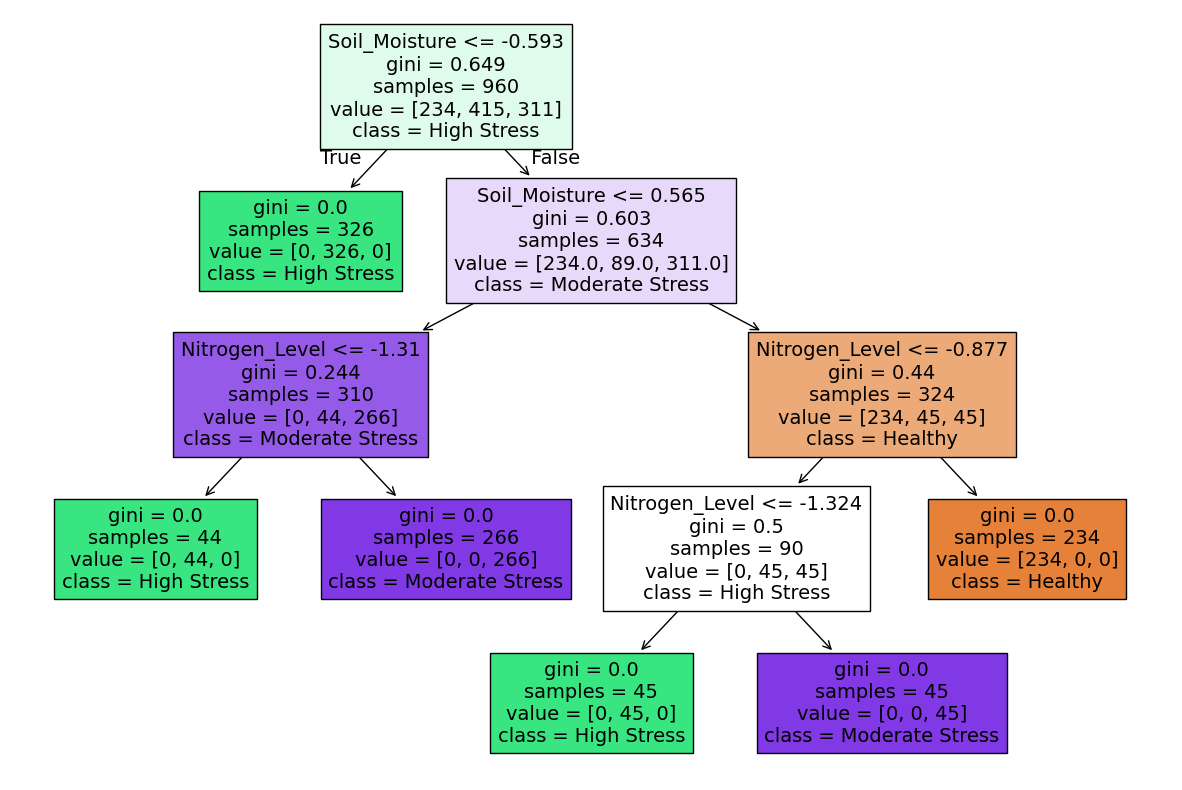


Predicted Plant Health Status: Healthy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("plant_health_data.csv")

# Features and target
features = ["Soil_Moisture", "Ambient_Temperature", "Soil_Temperature", "Humidity",
            "Light_Intensity", "Soil_pH", "Nitrogen_Level", "Phosphorus_Level",
            "Potassium_Level", "Chlorophyll_Content", "Electrochemical_Signal"]
target = "Plant_Health_Status"

# Handle missing values
# Fill numeric columns with the median
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Fill non-numeric columns with the mode
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode target variable (Healthy=0, Moderate Stress=1, High Stress=2)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Normalize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

# Save the trained model and scaler
joblib.dump(dt_model, "plant_health_model.pkl")
joblib.dump(scaler, "plant_health_scaler.pkl")
joblib.dump(label_encoder, "plant_health_label_encoder.pkl")

# Predictions
y_pred = dt_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.show()

# Sample input for prediction
sample_input = np.array([[45, 28, 25, 60, 12000, 6.5, 30, 15, 40, 35, -50]])  # Replace with real values
sample_input = scaler.transform(sample_input)  # Apply scaling

# Make prediction
predicted_class = dt_model.predict(sample_input)
predicted_label = label_encoder.inverse_transform(predicted_class)
print("\nPredicted Plant Health Status:", predicted_label[0])

CROP recommendation


In [5]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv('ad2.csv')

# Define input features and target variable
features = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil_moisture', 'soil_type',
    'sunlight_exposure', 'wind_speed', 'co2_concentration', 'organic_matter', 'irrigation_frequency',
    'crop_density', 'pest_pressure', 'fertilizer_usage', 'growth_stage', 'urban_area_proximity',
    'water_source_type', 'frost_risk', 'water_usage_efficiency'
]

target = 'label'

# Split the data into training and testing sets
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil_moisture', 'sunlight_exposure',
    'wind_speed', 'co2_concentration', 'organic_matter', 'irrigation_frequency', 'crop_density',
    'pest_pressure', 'fertilizer_usage', 'urban_area_proximity', 'frost_risk', 'water_usage_efficiency'
]
categorical_features = ['soil_type', 'growth_stage', 'water_source_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the trained model
joblib.dump(pipeline, "crop_recommendation_model.pkl")

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Model Performance:
Accuracy: 0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      0.96      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

SMART IRRIGATION FINAL


In [6]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('ad2.csv')

# Compute target variables
data['Optimal_Irrigation'] = (
    (0.1 * data['temperature']) +
    (-0.08 * data['humidity']) +
    (0.05 * data['wind_speed']) +
    (0.02 * data['sunlight_exposure']) +
    (-0.5 * data['soil_moisture']) +
    (0.3 * data['rainfall'].rolling(window=7, min_periods=1).mean()) +
    (-0.1 * data['irrigation_frequency'])
)
data['Optimal_Irrigation'] = np.maximum(0, data['Optimal_Irrigation'])

data['Water_Deficiency_Risk'] = (
    (0.2 * data['temperature']) +
    (-0.15 * data['humidity']) +
    (-0.3 * data['rainfall']) +
    (-0.4 * data['soil_moisture']) +
    (0.1 * data['wind_speed']) +
    (-0.1 * data['irrigation_frequency']) +
    (0.05 * data['frost_risk'])
)
data['Water_Deficiency_Risk'] = (data['Water_Deficiency_Risk'] - data['Water_Deficiency_Risk'].min()) / \
                               (data['Water_Deficiency_Risk'].max() - data['Water_Deficiency_Risk'].min()) * 10

data['Water_Efficiency_Score'] = (
    (0.3 * data['water_usage_efficiency']) +
    (0.1 * data['organic_matter']) +
    (0.1 * data['soil_moisture']) +
    (-0.05 * data['temperature']) +
    (0.05 * data['humidity']) +
    (0.05 * data['co2_concentration']) +
    (-0.03 * data['pest_pressure']) +
    (0.02 * data['crop_density'])
)
data['Water_Efficiency_Score'] = (data['Water_Efficiency_Score'] - data['Water_Efficiency_Score'].min()) / \
                                (data['Water_Efficiency_Score'].max() - data['Water_Efficiency_Score'].min())

# Define features and targets
features = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil_moisture',
    'soil_type', 'sunlight_exposure', 'wind_speed', 'co2_concentration',
    'organic_matter', 'irrigation_frequency', 'crop_density', 'pest_pressure',
    'fertilizer_usage', 'growth_stage', 'urban_area_proximity',
    'water_source_type', 'frost_risk', 'water_usage_efficiency'
]
targets = ['Optimal_Irrigation', 'Water_Deficiency_Risk', 'Water_Efficiency_Score']

# Split dataset
X = data[features]
y = data[targets]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'soil_moisture',
    'sunlight_exposure', 'wind_speed', 'co2_concentration', 'organic_matter',
    'irrigation_frequency', 'crop_density', 'pest_pressure', 'fertilizer_usage',
    'urban_area_proximity', 'frost_risk', 'water_usage_efficiency'
]
categorical_features = ['soil_type', 'growth_stage', 'water_source_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Train models
models = {}
for target in targets:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    pipeline.fit(X_train, y_train[target])
    models[target] = pipeline

# Save the trained model
joblib.dump(models, "smart_irrigation_model.pkl")

# Evaluate models
for target in targets:
    y_pred = models[target].predict(X_test)
    mse = mean_squared_error(y_test[target], y_pred)
    r2 = r2_score(y_test[target], y_pred)
    print(f"{target} - MSE: {mse:.4f}, R²: {r2:.4f}")

# Prediction function
def predict_water_metrics(new_data):
    result = {}
    for target in targets:
        pred = models[target].predict(new_data)
        result[target] = pred[0]
    return {
        "Optimal_Irrigation": result['Optimal_Irrigation'],
        "Water_Deficiency_Risk": int(result['Water_Deficiency_Risk']),
        "Water_Efficiency_Score": round(result['Water_Efficiency_Score'], 3)
    }

# Example prediction
new_conditions = pd.DataFrame([{
    'N': 90, 'P': 42, 'K': 43, 'temperature': 20, 'humidity': 82, 'ph': 6.5,
    'rainfall': 202, 'soil_moisture': 29, 'soil_type': 'sandy', 'sunlight_exposure': 10,
    'wind_speed': 435, 'co2_concentration': 3.1, 'organic_matter': 4,
    'irrigation_frequency': 11, 'crop_density': 57, 'pest_pressure': 188,
    'fertilizer_usage': 1, 'growth_stage': 'mature', 'urban_area_proximity': 3,
    'water_source_type': 'groundwater', 'frost_risk': 3, 'water_usage_efficiency': 96
}])

prediction = predict_water_metrics(new_conditions)
print("Prediction:", prediction)


Optimal_Irrigation - MSE: 20.7861, R²: 0.9100
Water_Deficiency_Risk - MSE: 0.0378, R²: 0.9896
Water_Efficiency_Score - MSE: 0.0018, R²: 0.9383
Prediction: {'Optimal_Irrigation': np.float64(47.46827009479761), 'Water_Deficiency_Risk': 3, 'Water_Efficiency_Score': np.float64(0.41)}


In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
import sklearn
print(sklearn.__version__)


1.6.1
